In [11]:
import cv2
import dlib
from matplotlib import pyplot as plt
import numpy as np
import math

In [13]:
def similarityTransform(inPoints, outPoints):
    s60 = math.sin(60*math.pi/180)
    c60 = math.cos(60*math.pi/180)
    
    inPts = np.copy(inPoints).tolist()
    outPts = np.copy(outPoints).tolist()

  # The third point is calculated so that the three points make an equilateral triangle
    xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0]
    yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1]
    
    inPts.append([np.int(xin), np.int(yin)])
    xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0]
    yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1]
    
    outPts.append([np.int(xout), np.int(yout)])

  # Now we can use estimateRigidTransform for calculating the similarity transform.
    tform = cv2.estimateAffinePartial2D(np.array([inPts]), np.array([outPts]))
    return tform[0]

In [4]:
family_img = cv2.imread("family.jpg")
face1 = cv2.imread("face1.png")
face2 = cv2.imread("face2.png")

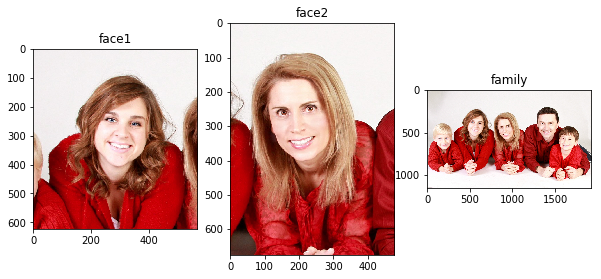

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(131);plt.title("face1");plt.imshow(face1[:,:,::-1]);
plt.subplot(132);plt.title("face2");plt.imshow(face2[:,:,::-1]);
plt.subplot(133);plt.title("family");plt.imshow(family_img[:,:,::-1]);

In [8]:
facedetector = dlib.get_frontal_face_detector()
facedetections = facedetector(face1)

landmarkDetector = dlib.shape_predictor("D:\OpenCV-II-Applications\Week1-FacialLandmarkDetection\shape_predictor_68_face_landmarks.dat")

h = 600
w = 600

In [33]:
def normalizeImagesAndLandmarks(outSize, imIn, eyecornerSrc):
    h, w = outSize

    # Corners of the eye in normalized image
    eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),
                  (np.int(0.7 * w), np.int(h/3))]
    print(eyecornerDst)
    # Calculate similarity transform
    tform = similarityTransform(eyecornerSrc, eyecornerDst)
    imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

    # Apply similarity transform to input image
    imOut = cv2.warpAffine(imIn, tform, (w, h))

    # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
    points2 = np.reshape(eyecornerSrc, (eyecornerSrc.shape[0], 1, eyecornerSrc.shape[1]))

    # Apply similarity transform to landmarks
    pointsOut = cv2.transform(points2, tform)

    # reshape pointsOut to numLandmarks x 2
    pointsOut = np.reshape(pointsOut, (eyecornerSrc.shape[0], eyecornerSrc.shape[1]))

    return imOut, pointsOut

255 247
[(180, 200), (420, 200)]


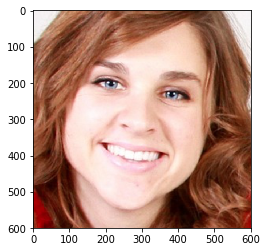

In [34]:
for i in facedetections:
    landmarks = landmarkDetector(face1,i)
    left_eye = [landmarks.part(36).x,landmarks.part(36).y]
    right_eye = [landmarks.part(45).x,landmarks.part(36).y]
    print(landmarks.part(36).x,landmarks.part(36).y)
    imOut, pointsOut = normalizeImagesAndLandmarks((h,w),face1,np.array([left_eye,right_eye]))
    plt.imshow(imOut[:,:,::-1])